In [49]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense, Dropout, LSTM

In [50]:
# Define variables

crypto_currency = 'ETH'
against_currency = 'USD'

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)

# print(data.iloc[data.shape[0] - 1]) # print last value from dataframe

[*********************100%***********************]  1 of 1 completed


In [51]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 7
future_day = 3


x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data) - future_day):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x + future_day, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [52]:
# Create Neural Network

import tensorflow as tf

model = tf.keras.Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
63/63 [==============================] - 3s 11ms/step - loss: 0.0199
Epoch 2/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0038
Epoch 3/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0032
Epoch 4/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0030
Epoch 5/25
63/63 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 6/25
63/63 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 7/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 8/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 9/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 10/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 11/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0029
Epoch 12/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 13/25
63/63 [==================

In [53]:
# Testing The Model

test_start = dt.datetime(2022, 1, 1)
test_end = dt.datetime.now()

test_data = yf.download(f'{crypto_currency}-{against_currency}', start=test_start, end=test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

[*********************100%***********************]  1 of 1 completed
16/16 [==============================] - 0s 2ms/step


In [54]:
# Print Actual Price and Predictions
print('Predicted Prices for Next 3 Days')
print(prediction_prices[-3:])

Predicted Prices for Next 3 Days
[[1859.1221]
 [1836.1884]
 [1821.9452]]


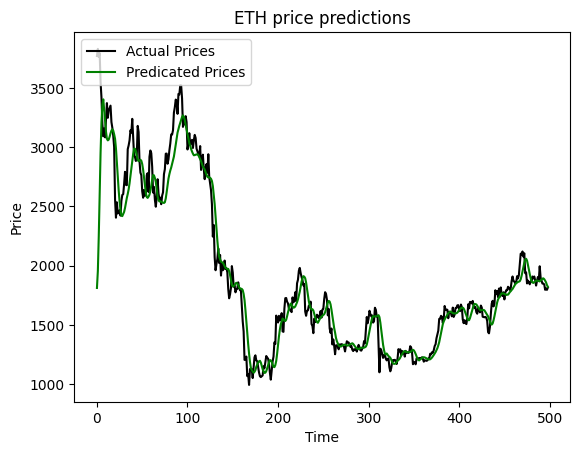

In [55]:
# Plot Predictions

plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicated Prices')
plt.title(f'{crypto_currency} price predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()